## Internship Studio: Machine Learning Project

Title:  Marketing Campaign for Banking Products
###### Submitted by: SIVANJANA KK (sivanjanakk@gmail.com)

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 1) Import Libraries and Dataset:-


In [ ]:
import pandas as pd                  # Pandas: For reading the CSV Dataset file, creating DataFrames and performing analysis
import numpy as np                   # NumPy: For suitable array operations in an easier way
import seaborn as sns                # Seaborn: For the purpose of visualization of data using various plots
import matplotlib.pyplot as plt      # Matplotlib: For plotting the graphs
%matplotlib inline
# SciKit learn: The Python library for scientific ML techniques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from  sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
sns.set_style("white")               # The plots color style is set to 'white'
pd.options.mode.chained_assignment = None

Reading the Dataset using Pandas and then converting it to DataFrame df-

In [ ]:
dc = pd.read_excel('datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx')
df = pd.DataFrame(dc)

In [ ]:
# Let's see if we have correctly imported the data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### 2) Data Summary:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
df.shape

(5000, 14)

In [ ]:
print(df.index)
print('')
print(df.columns)

RangeIndex(start=0, stop=5000, step=1)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
df[df.isnull()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df[df<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

#### 3) Data Cleaning

cleaning the data to make suitable for applying Machine Learning algorithms

As we can observe from our last cell results, some of the values are negative. We will set the negative values to the median of the remaining values in that column. The reason for choosing Median and not Mean is that Mean is sensitive to outliers in the Dataset while the Median is not.

In [100]:
df[df['Experience'] < 0]['Experience'].count()

52

In [101]:
# Setting the negative values equal to the Median
lmdvalue = int(df['Experience'].median())
for i in range(len(df)):
    if df['Experience'].iloc[i] < 0:
        df['Experience'].iloc[i] = lmdvalue

In [102]:
df[df['Experience'] < 0]['Experience'].count()

0

In [103]:
# Let's set ID column as the Index column since it will not affect the Model prediction
df.set_index(['ID'], inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [104]:
# To avoid the inconvenience, let's lowercase all the column labels
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

#### 4) Exploratory Data Analysis (EDA):

Let us visualize the given Dataset using Seaborn library plots so that we can get some idea of the various patterns, if any.
Let's first go sequentially with the tasks assigned as per the project document.

In [105]:
# Finding the number of unique values in each of the columns
df.nunique()

age                    45
experience             44
income                162
zip code              467
family                  4
ccavg                 108
education               3
mortgage              347
personal loan           2
securities account      2
cd account              2
online                  2
creditcard              2
dtype: int64

Taking a deeper dive into the nature of Features or Variables-

1) ID: We have already set this as our Index column. Can be safely omitted from EDA.

2) Age: The Customer's age is a Numerical data of type Interval.

3) Income: Annual Income of customers is a Numerical data of type Ordinal. One of the key feature for our Model prediction.

4) ZIP Code: Home address of the Customers. Need not be considered in EDA.

5) Family: Family size of the customer. Need not be considered in EDA.

6) CC Avg.:  Credit cards spending per month ($000). This is a Numerical data type which will give us an idea overall economic level of a Customer.

7) Education: This is a Nominal categorical data type. 

8) Mortgage: This Numerical data type gives the value of House mortgage.

9) Personal Load: This is our feature to be predicted. The data in the column is categorical and nominal.

10) Securities Account: This Nominal Categorical data type indicates if the Customer has an account in the bank.

11) CD Account: This is one of our Categorical data columns.

12) Online: This Nominal Categorical data type tells if the Customer has an Online Account.

13) Credit Card: This Nominal Categotical data value tells about possession of Credit card by the Customer.

With this, we can broadly divide our Dataset into

A) Numerical: ['age', 'experience', 'income', 'zip code', 'family', 'ccavg', education', 'mortgage']

B) Categorical: ['personal loan', 'securities account', 'cd account', 'online', 'creditcard']

In [106]:
# Let's find the Columns having Numerical data
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

In [107]:
numeric_features.head()

,age,experience,income,zip code,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [108]:
# Finding the number of people with zero Mortgage value
df[df['mortgage'] == 0]['mortgage'].count()

3462

In [109]:
# Finding the number of people with no Credit card spending per month
df[df['ccavg'] == 0]['ccavg'].count()

106

Now we will find the Value counts of our Categorical columns-

In [110]:
df['education'].value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [111]:
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [112]:
df['securities account'].value_counts()

0    4478
1     522
Name: securities account, dtype: int64

In [113]:
df['cd account'].value_counts()

0    4698
1     302
Name: cd account, dtype: int64

In [114]:
df['online'].value_counts()

1    2984
0    2016
Name: online, dtype: int64

In [115]:
df['creditcard'].value_counts()

0    3530
1    1470
Name: creditcard, dtype: int64

Now that we have found out the counts of these categorical columns, let's see how many customers who bought the Personal loan use other services provided by the bank.

In [116]:
df_ser = df[['personal loan', 'securities account', 'cd account', 'online', 'creditcard']]
df_serg= df_ser.groupby('personal loan').sum()
df_serg

,securities account,cd account,online,creditcard
personal loan,,,,
0,462,162,2693,1327
1,60,140,291,143


In [117]:
df_serg.describe().T

,count,mean,std,min,25%,50%,75%,max
securities account,2.0,261.0,284.256926,60.0,160.5,261.0,361.5,462.0
cd account,2.0,151.0,15.556349,140.0,145.5,151.0,156.5,162.0
online,2.0,1492.0,1698.470488,291.0,891.5,1492.0,2092.5,2693.0
creditcard,2.0,735.0,837.214429,143.0,439.0,735.0,1031.0,1327.0


Coming to Univariate Analysis using different plots:

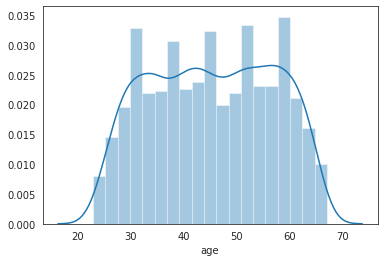

In [118]:
sns.distplot(df['age'], kde=True);

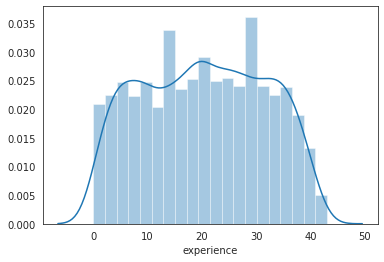

In [119]:
sns.distplot(df['experience']);

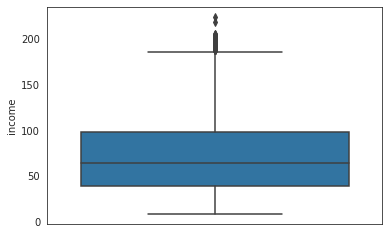

In [120]:
sns.boxplot(df['income'], orient='vertical');

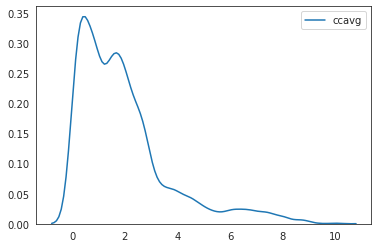

In [121]:
sns.kdeplot(df['ccavg']);

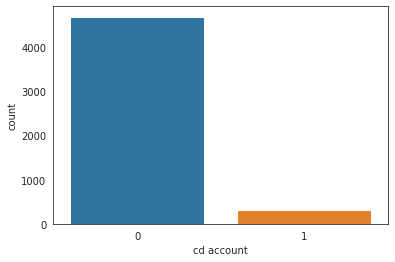

In [122]:
sns.countplot(df['cd account']);

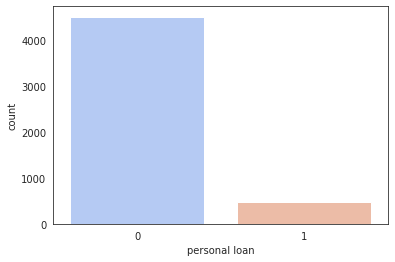

In [123]:
sns.countplot(df['personal loan'], palette='coolwarm');

Let's now perform some Bivariate Analysis.

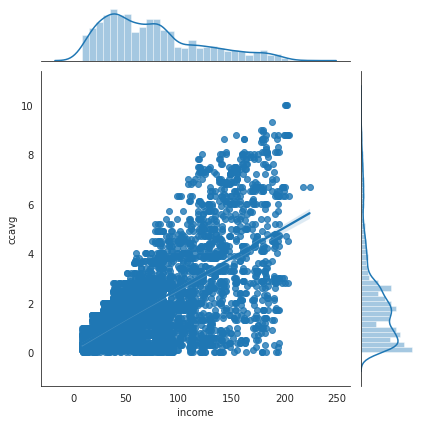

In [124]:
sns.jointplot(x='income',y='ccavg',data=df,kind='reg');

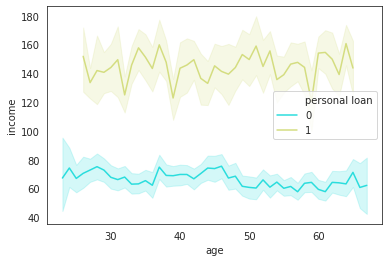

In [125]:
sns.lineplot(x="age", y="income", hue='personal loan', data=df,palette='rainbow');

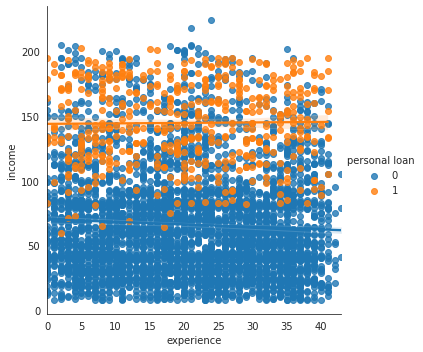

In [126]:
sns.lmplot(x='experience', y='income', hue='personal loan', data=df);

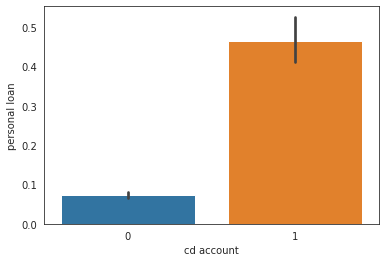

In [127]:
sns.barplot(x='cd account', y='personal loan', data=df);

Finally let's try Multivariate Analysis:

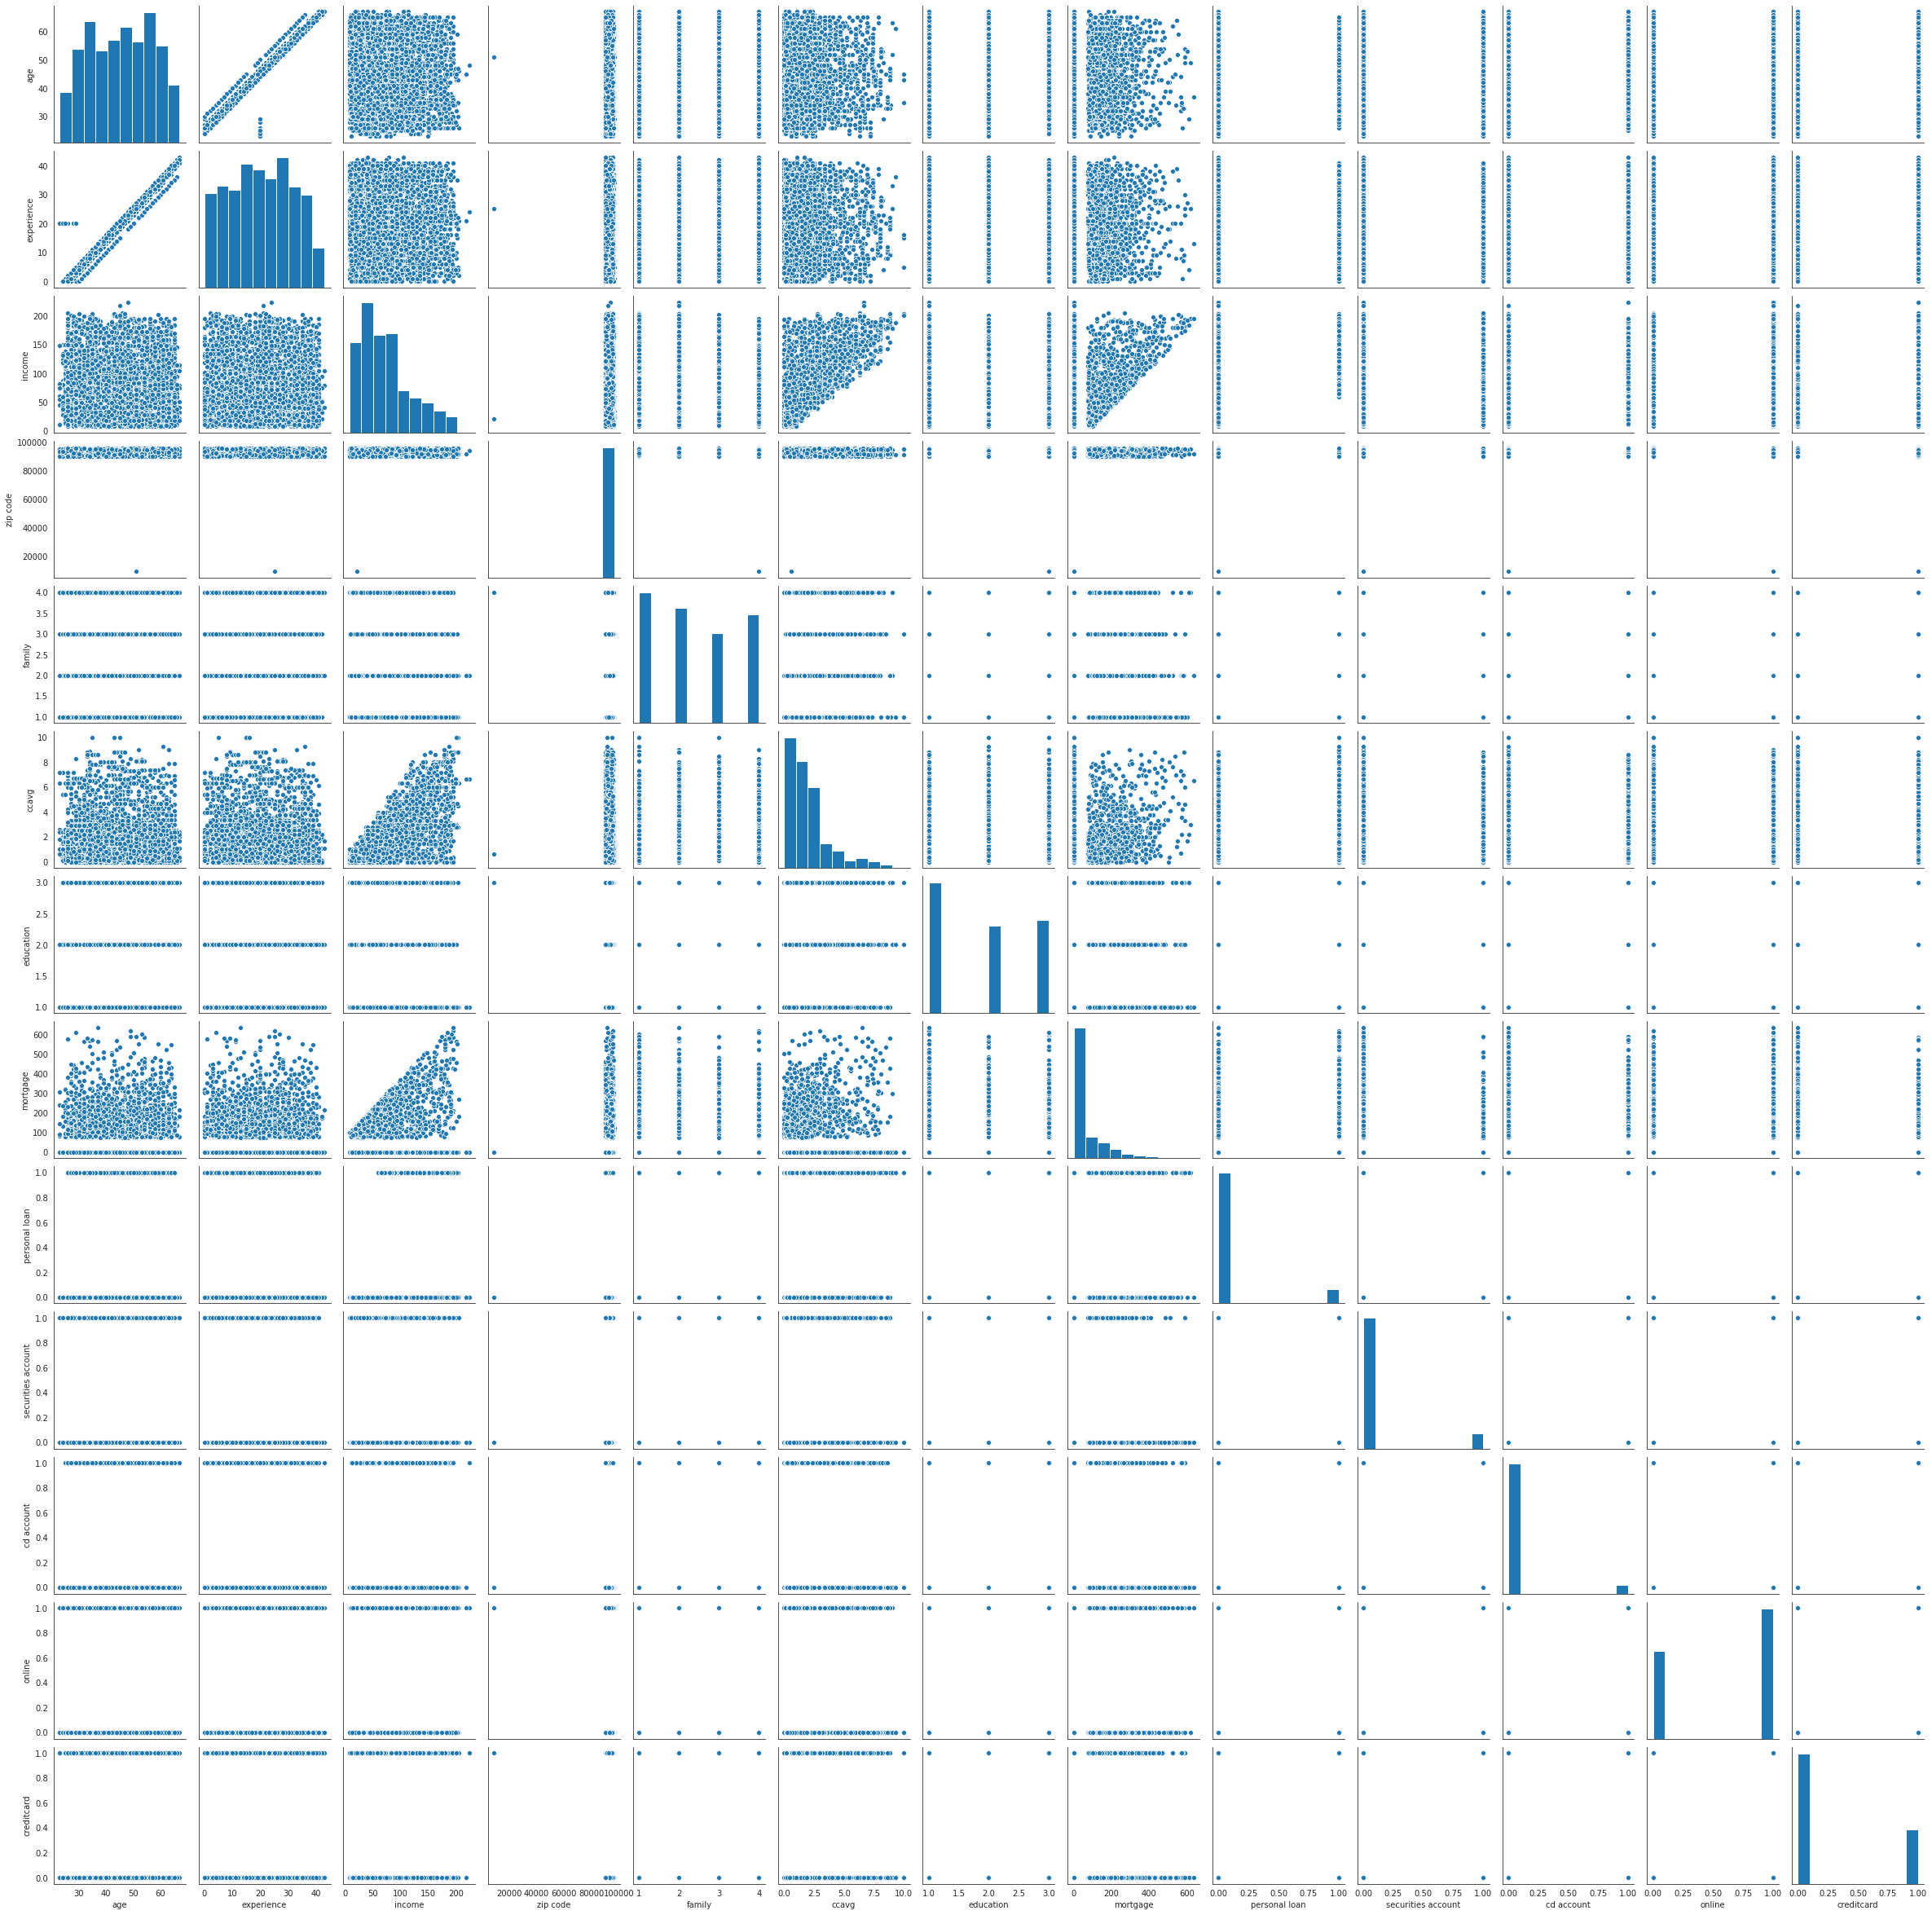

In [128]:
# A pairplot to get a broader perspective
sns.pairplot(df, palette='coolwarm');

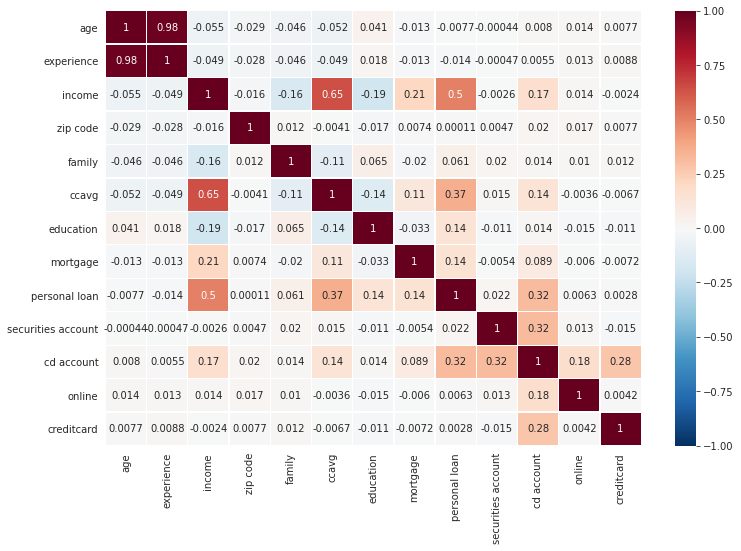

In [129]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1,center=0, cmap='RdBu_r',linecolor='white',linewidths=0.25);

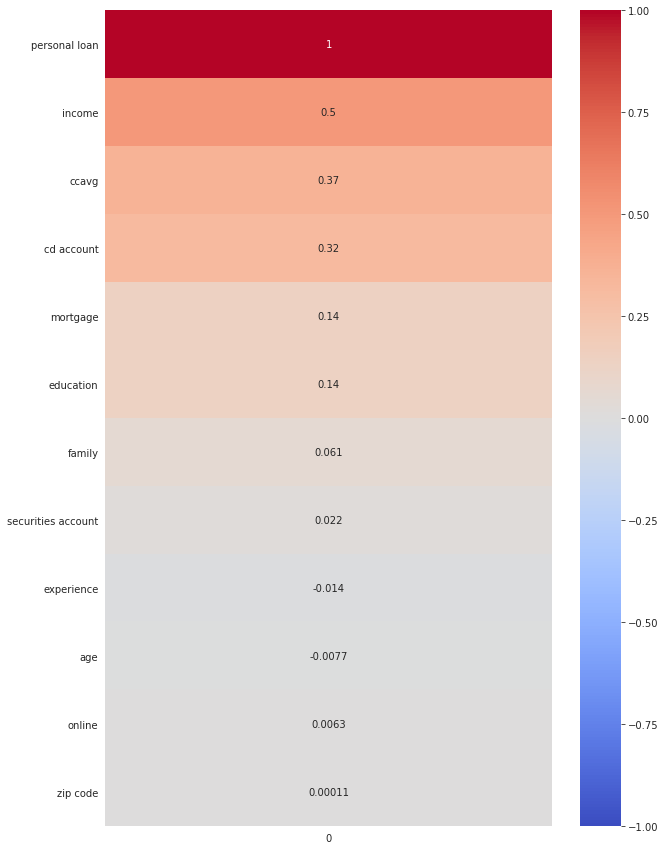

In [130]:
#correlation between all of the numeric variables in the data frame and the target-personal_loan
#Pandas’ corrwith() method return a pair-wise correlation
correlations = df.corrwith(df['personal loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

#### 5) Train-Test Dataset split & Feature Inspection and Transformation

In this part, we will have a close check at the distribution of all the features in our Dataset. A balanced Dataset is essential for unbiased predictions from our model.

In [ ]:
# As we can see from our last plot in the Univariate Analysis, we have 2 classes in the 'Personal Loan' Feature. However, their ratio is approximately 1:10 which indicates that our Dataset is imbalanced.
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

We will divide our Dataset into a Training data and a Test data set, in the ratio of 70:30. The stratify parameter of train_test_split function will be used to get the same class distribution across our train and the test data set.

In [ ]:
# Let's first separate out our output column 'personal loan'

data_X = df.loc[:, df.columns != "personal loan"]
data_Y = df[["personal loan"]]

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(data_X, data_Y, test_size=0.30, stratify=data_Y, random_state=0)
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

Now, let's check each of our Numerical & Ordinal Categorical features in train_X set for Skewness and Outliers. Outliers affect the learning performance thus it is very essential to perform Outlier analysis for each feature, one-by-one. For each feature, we will check two plot, Normalized histogram using distplot() to check Skewness and Boxplot to check for Outliers.Then, for Skewed data, we will apply suitable Transformation to remove the Outliers and reduce the Skewness. Outliers Analysis is not reauired for other Nominal or Binary Categorical features.

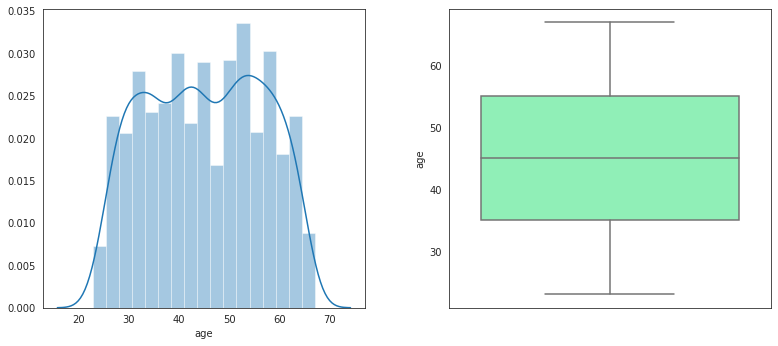

In [ ]:
# Feature 1: 'Age' is our Numerical interval data.

fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.distplot(X_train["age"], ax=axes[0]);
sns.boxplot(X_train["age"], orient="vertical", ax=axes[1], palette = 'rainbow')

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Age' feature.

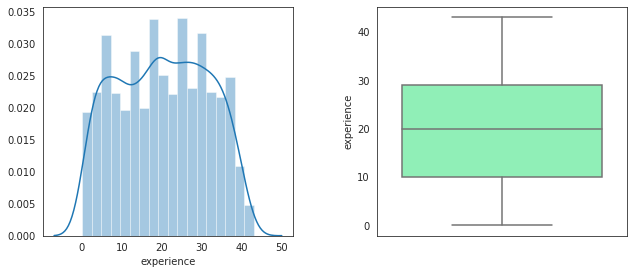

In [ ]:
# Feature 2: 'Experience' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["experience"], ax=axes[0]);
sns.boxplot(X_train["experience"], orient="vertical", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Experience' feature.

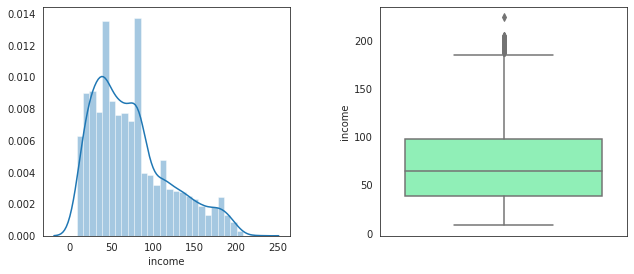

In [ ]:
# Feature 3: 'Income' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["income"], ax=axes[0]);
sns.boxplot(X_train["income"], orient="v", palette="rainbow", ax=axes[1]);

fig.tight_layout(pad=5.0)

Now, we have a highly skewed Distribution of Income feature. It can be classified as a log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. We will use Yeo-Johnson method from scikit-learn, PowerTransformer. The reuslting distribution is as shown below:

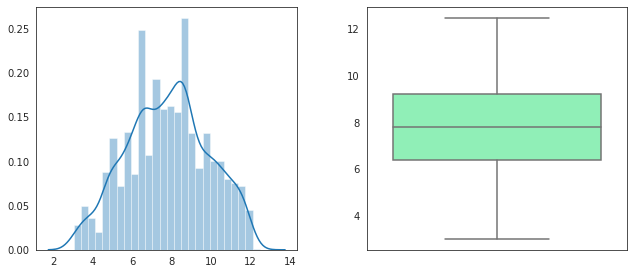

In [ ]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)

pt_income.fit(X_train["income"].values.reshape(-1, 1))

pti = pt_income.transform(X_train["income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Income' feature is no longer skewed and there are no Outliers as well.

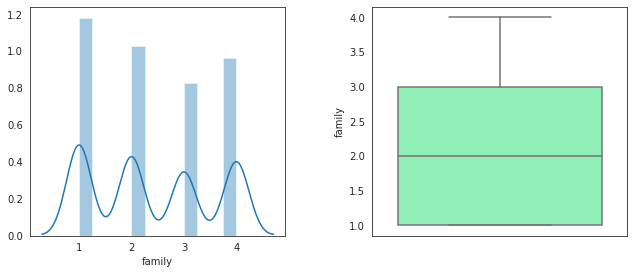

In [ ]:
# Feature 4: 'Family' is our Ordinal Categorical data.
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["family"], ax=axes[0]);
sns.boxplot(X_train["family"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Family' feature.

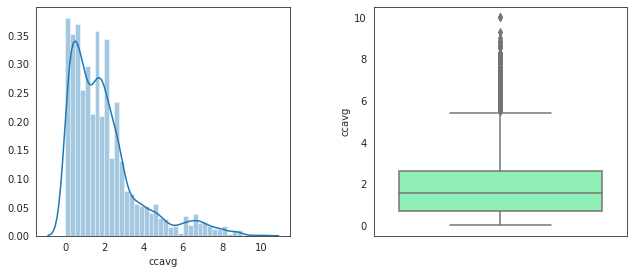

In [ ]:
# Feature 5: 'CC Avg' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["ccavg"], ax=axes[0]);
sns.boxplot(X_train["ccavg"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

Now, similar to 'Income'  feature, we again have a left skewed Distribution of CC Avg feature which has a log-normal distribution. We will use the same Yeo-Johnson method from scikit-learn, PowerTransformer to apply log transformation to Income, resulting distribution will be similar to a Gaussian. The resulting distribution is as shown below:

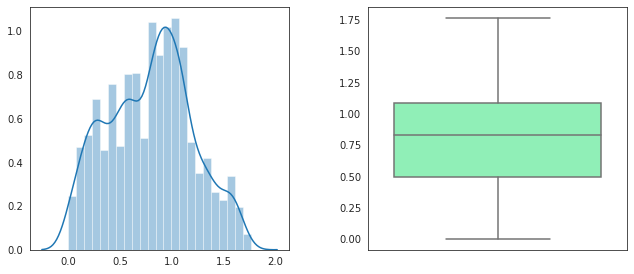

In [ ]:
pt_ccavg = PowerTransformer(method="yeo-johnson", standardize=False)

pt_ccavg.fit(X_train["ccavg"].values.reshape(-1, 1))

ptc = pt_ccavg.transform(X_train["ccavg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ptc, ax=axes[0]);
sns.boxplot(ptc, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'CC Avg' feature is no longer skewed and there are no Outliers as well.

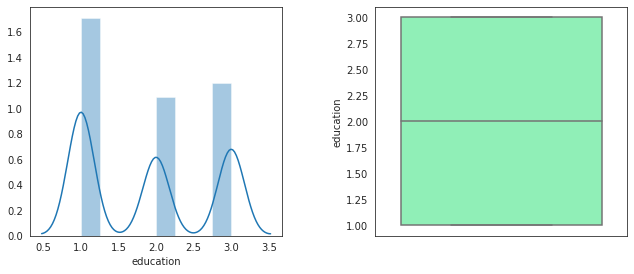

In [ ]:
# Feature 6: 'Education' is our Ordinal Categorical data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["education"], ax=axes[0]);
sns.boxplot(X_train["education"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As can be observed, there are no Outliers for the 'Education' feature.

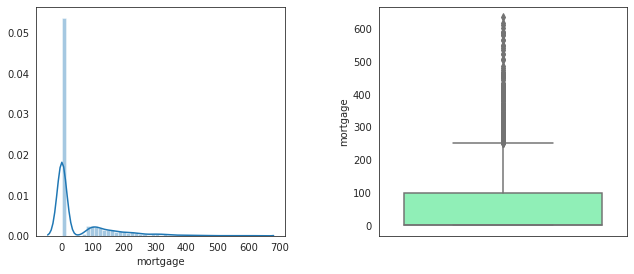

In [ ]:
# Feature 7: 'Mortgage' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["mortgage"], ax=axes[0]);
sns.boxplot(X_train["mortgage"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Mortgage' feature is highly skewed and there are a lot of Outliers as well. We can construct an ordinal categorical feature int_mortgage using Mortgage feature and then drop Mortgage feature. Same procedure will be applied to test_X as well.

In [ ]:
X_train["int_mortgage"] = pd.cut(X_train["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_train.drop("mortgage", axis=1, inplace=True)

X_test["int_mortgage"] = pd.cut(X_test["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_test.drop("mortgage", axis=1, inplace=True)

The remaining features are Binary Categorical. Thus, no Outlier Analysis is required.

Now let's perform 'Standardization' on our Dataset to increase our learning performance.
StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

In [ ]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()

    # fit to the training data
    scaler.fit(X_train[[column]])

    # transform the training data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[:, column] = pd.Series(np_array.flatten())

    # transform the test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[:, column] = pd.Series(np_array.flatten())

Now, we inspect the linear correlations between features and also between features and output. Pandas corr function is used to compute correlation matrix and Seaborn heatmap is used for plotting. The semicolon at the end of seaborn command is used to suppress the output other than the plot. Correlation is in interval [-1,1], so our colorbar is.

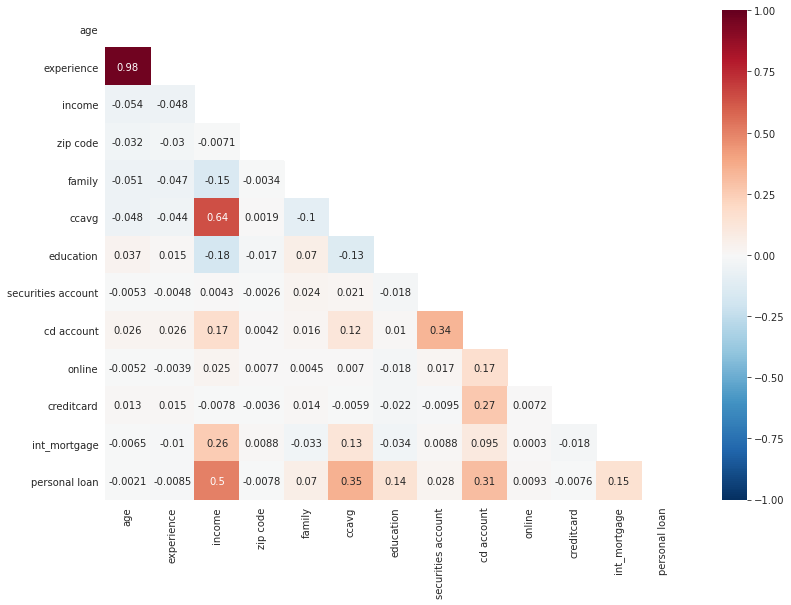

In [ ]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="RdBu_r");

Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models. We drop Experience feature from both train_X and test_X.

In [ ]:
X_train.drop("experience", axis=1, inplace=True)
X_test.drop("experience", axis=1, inplace=True)

#### 6) Logistic Regression Model

Let's apply Logistic Regression method and check the Perfromance Metrics.

In [ ]:
logmodel = LogisticRegression();
logmodel.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
logmodel.score(X_train, y_train)

0.952

In [ ]:
logmodel.score(X_test, y_test)

0.9513333333333334

In [ ]:
logmodel_predict = logmodel.predict(X_test)

In [ ]:
cm_logmodel = confusion_matrix(y_test, logmodel_predict, labels=[0,1])
print(cm_logmodel)

print(classification_report(y_test,logmodel_predict))

acc_score = accuracy_score(y_test, logmodel_predict)
f1_score = f1_score(y_test, logmodel_predict)
print("Accuracy Score  for Logistic Regression is: {}".format(acc_score * 100))
print("F1 Score  for Logistic Regression is: {}".format(f1_score * 100))



[[1337   19]
 [  54   90]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



TypeError: ignored